In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors
from sklearn import linear_model

In [3]:
np.random.seed(1)
X = 1.5 * np.random.randn(100) + 10.5   # Array of 1000 values with mean = 1.5, stddev = 2.5
res = 0.5 * np.random.randn(100)       # Generate 1000 residual terms
y = 20 + 0.3 * X  + res 

In [4]:
df = pd.DataFrame({'StudyTime': X,'Score': y})

In [5]:
df

,StudyTime,Score
0,12.936518,23.657391
1,9.582365,23.486963
2,9.707742,23.114069
3,8.890547,22.963953
4,11.798111,22.991978
...,...,...
95,10.616010,22.371084
96,9.984219,23.296425
97,10.565395,23.379760
98,9.569999,23.276475


In [6]:
max(X)


13.778363109799741

In [7]:
min(X)

7.047691954679576

In [8]:
max(y)

25.228858797424788

In [9]:
min(y)

21.57339618758479

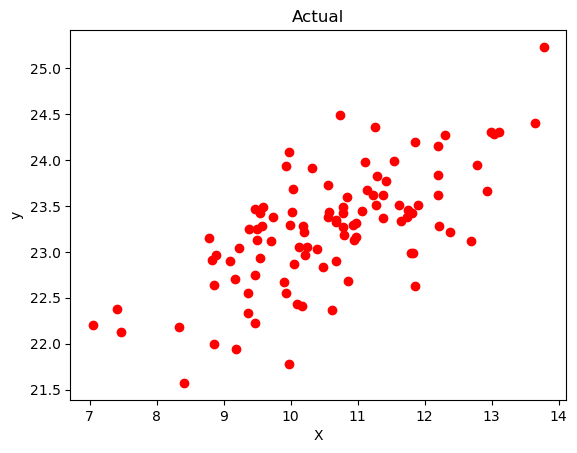

In [10]:
plt.plot(X, y, 'ro')   # scatter plot showing actual data
plt.title('Actual')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [11]:
def loss_function(m1,m2, b, points):
    total_error =0
    for i in range(len(points)):
        x=points.iloc[i].StudyTime
        yy=points.iloc[i].Score
        total_error += (yy-(m1*(x**2)+m2*x+b))**2
    return total_error/ float(len(points))    
    
    

In [12]:
def gradient_descent(m1_now,m2_now,b_now,points,L):
    m1_gradient =0
    m2_gradient =0
    b_gradient =0
    n=len(points)
    
    for i in range(n):
        x=points.iloc[i].StudyTime
        yy= points.iloc[i].Score
        
        m1_gradient += -(2/n)*(x**2)*(yy-(m1_now*(x**2)+m2_now*x+b_now))
        m2_gradient += -(2/n)*x*(yy-(m1_now*(x**2)+m2_now*x+b_now))
        b_gradient += -(2/n)* (yy-(m1_now*(x**2)+m2_now*x+b_now))
        
    m1 = m1_now - m1_gradient *L
    m2 = m2_now - m2_gradient *L
    b = b_now - b_gradient *L
    return m1,m2,b
    

In [13]:
m1=0
m2=0
b =0

L=0.000068 #try 0.008 and 0.009
epochs =50000

In [14]:
for i in range(epochs):
    if i% 500==0:
        print(f"Epoch: {i}")
        print(m1,m2,b)
    m1,m2,b = gradient_descent(m1,m2,b,df,L)
    
#print(m,b)

Epoch: 0
0 0 0
Epoch: 500
0.1535692701731444 0.4319598167599857 0.08086112668485061
Epoch: 1000
0.11952093597563261 0.8025043670425458 0.15177342229768917
Epoch: 1500
0.08909389112775237 1.1336325640223759 0.21521169559985856
Epoch: 2000
0.0619030473712839 1.4295359467080415 0.27197073263828886
Epoch: 2500
0.03760426676845499 1.6939603254682214 0.32276080183937333
Epoch: 3000
0.015890007041133917 1.9302531808558852 0.3682166416204364
Epoch: 3500
-0.0035145700149478818 2.1414060220371502 0.4089054922577712
Epoch: 4000
-0.020855076284390046 2.3300922408209925 0.44533427364510747
Epoch: 4500
-0.036351005261615124 2.4987009402879417 0.4779559997685828
Epoch: 5000
-0.050198509482861677 2.6493671660793825 0.5071755110658677
Epoch: 5500
-0.06257288260580253 2.7839989228887676 0.5333545972056954
Epoch: 6000
-0.07363077754458955 2.9043013180166795 0.5568165751105508
Epoch: 6500
-0.08351218872821818 3.0117981374980713 0.5778503801520104
Epoch: 7000
-0.09234222356535499 3.107851127822168 0.596714

In [1]:
# m1=-0.18
# m2=4
# b=0.9
ypred = m1*(X**2)+m2*X + b

NameError: name 'm1' is not defined

In [48]:
z=loss_function(m1,m2, b, df)
z

0.39954909755678003

In [49]:
df.iloc[0].StudyTime


12.936518045494863

In [50]:
z= (df.iloc[0].StudyTime **2)*m1 +df.iloc[0].StudyTime *m2+  b
z

23.531510768575234

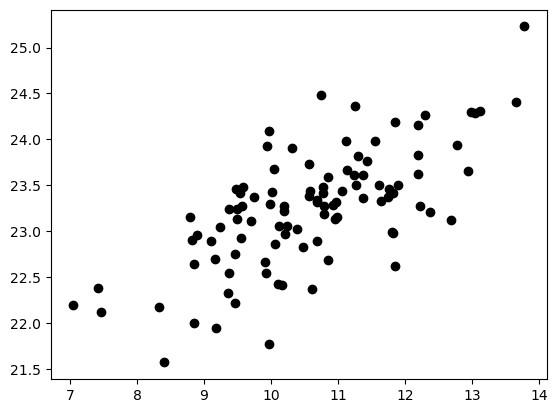

In [51]:
plt.scatter(df.StudyTime,df.Score,color="black")
#plt.plot(list(range(6,14)),[m*x+b for x in range(6,14)], color="red")
plt.show()
# plt.plot(df.StudyTime,df.Score)
# plt.show()

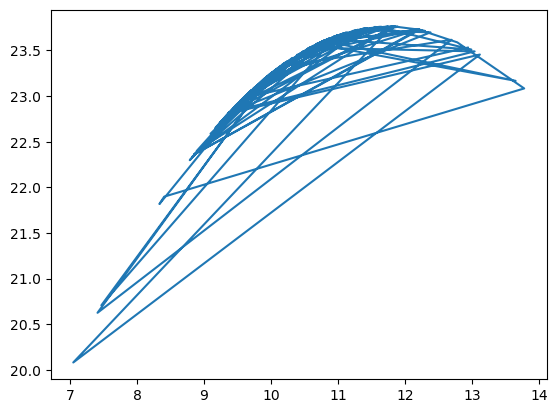

In [52]:
plt.plot(X, ypred)     # regression line
plt.show()

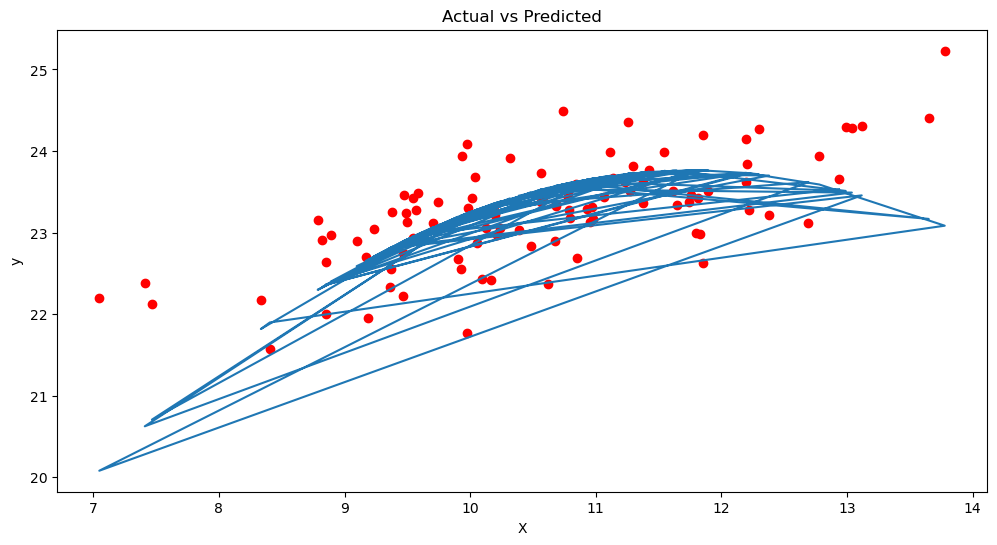

In [53]:
plt.figure(figsize=(12, 6))
plt.plot(X, y, 'ro')   # scatter plot showing actual data
plt.plot(X, ypred)     # regression line
plt.title('Actual vs Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [56]:
def predict(value):
    #value = X
    for i in range(value):
        # straight line = m*x+y
       print(i, ':',df.iloc[i].StudyTime,':',df.iloc[i].Score,':',(df.iloc[0].StudyTime **2)*m1 +df.iloc[0].StudyTime *m2+  b,)

In [57]:
predict(12)

0 : 12.936518045494863 : 23.65739113125546 : 23.531510768575234
1 : 9.582365379524887 : 23.486963466260214 : 23.531510768575234
2 : 9.707742371604816 : 23.114068532376844 : 23.531510768575234
3 : 8.890547066765745 : 22.96395338164826 : 23.531510768575234
4 : 11.798111443987018 : 22.991977510325583 : 23.531510768575234
5 : 7.047691954679576 : 22.198998802933204 : 23.531510768575234
6 : 13.11721764632472 : 24.305443519445554 : 23.531510768575234
7 : 9.358189648657346 : 22.330606593693233 : 23.531510768575234
8 : 10.978558644085648 : 23.160458340223883 : 23.531510768575234
9 : 10.125944436783884 : 23.054090604381845 : 23.531510768575234
10 : 12.693161905567461 : 23.12138991154686 : 23.531510768575234
11 : 7.409788935753519 : 22.380516376747202 : 23.531510768575234
